# 02 Bar Chart
- show the relationship between a numeric value and a categorical variable
- each value of the categorical valriable is represented as a rectangular bar
- the bar size will be proportional to the numeric value it represents

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.isnull().sum() #isnull().sum(): sum of missing values

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
#passengers, that survived
survived_df=titanic[titanic["survived"]==True]

In [5]:
names = survived_df["sex"].unique() #unique values not all
print(names)

['female' 'male']


In [7]:
#show how many males and females survived
values = survived_df["sex"].value_counts()
print(values)

female    233
male      109
Name: sex, dtype: int64


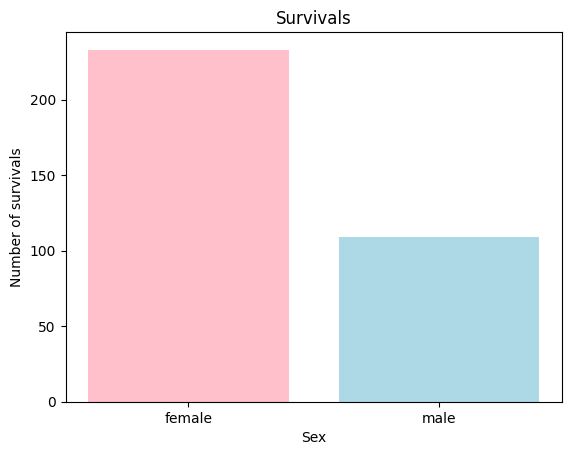

In [10]:
fig, ax = plt.subplots()
ax.bar(names, values, color=["pink", "lightblue"])
ax.set_xlabel("Sex")
ax.set_ylabel("Number of survivals")
ax.set_title("Survivals")
plt.show()

In [11]:
survived=titanic.groupby("sex")["survived"].sum()
survived.head()

sex
female    233
male      109
Name: survived, dtype: int64

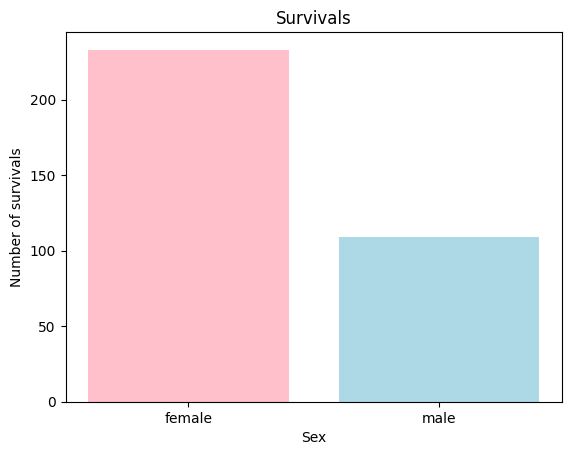

In [12]:
fig, ax = plt.subplots()
ax.bar(survived.index, survived.values, color=["pink", "lightblue"])
ax.set_xlabel("Sex")
ax.set_ylabel("Number of survivals")
ax.set_title("Survivals")
plt.show()

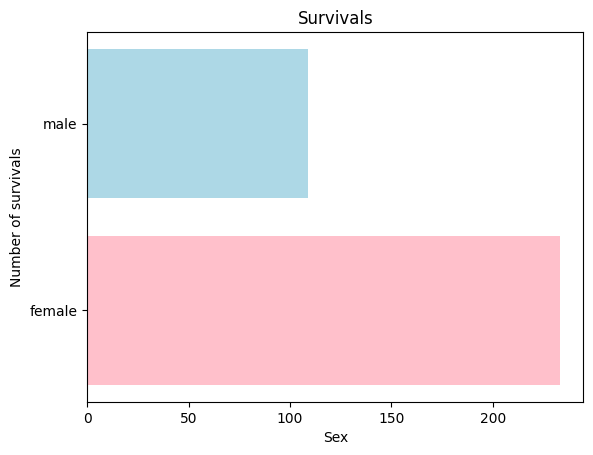

In [13]:
#show bars horizontically with barh
fig, ax = plt.subplots()
ax.barh(survived.index, survived.values, color=["pink", "lightblue"])
ax.set_xlabel("Sex")
ax.set_ylabel("Number of survivals")
ax.set_title("Survivals")
plt.show()

In [15]:
tips = sns.load_dataset("tips")
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


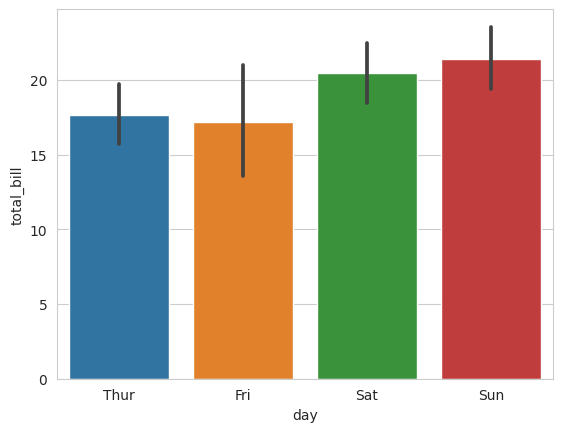

In [20]:
fig, ax = plt.subplots()
sns.set_style("whitegrid")
ax = sns.barplot(x="day", y="total_bill", data=tips, ax=ax)
plt.show()

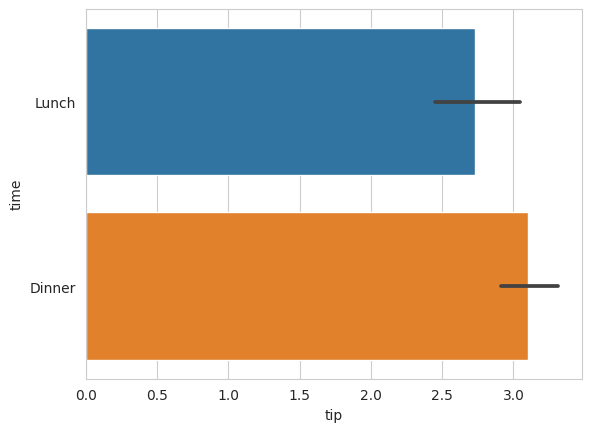

In [21]:
fig, ax = plt.subplots()
sns.set_style("whitegrid")
ax = sns.barplot(x="tip", y="time", data=tips, ax=ax)
plt.show()

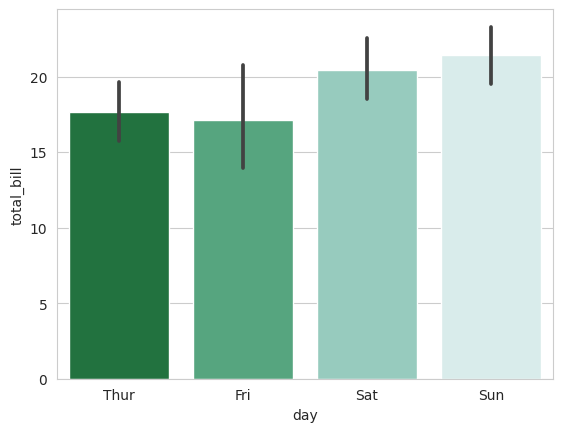

In [25]:
fig, ax = plt.subplots()
sns.set_style("whitegrid")
#use a palette to change the colors
ax = sns.barplot(x="day", y="total_bill", palette="BuGn_r", data=tips, ax=ax)
plt.show()

# 03 Grouped Bar Chart
compare different categories of two or more categorical groups using the same numerical variable

In [26]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


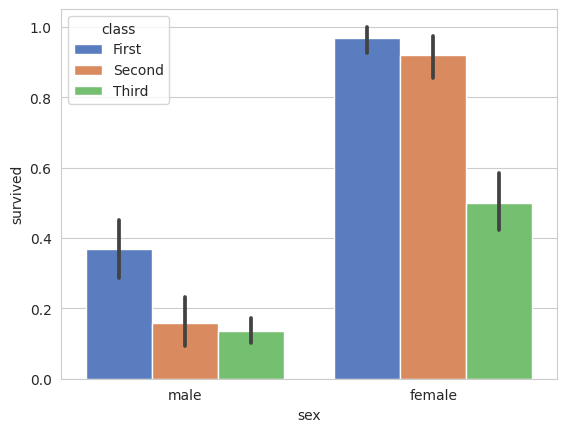

In [27]:
#grouped by First, Second and Third (grouped bye color)
fig, ax = plt.subplots()
ax = sns.barplot(x="sex", y="survived", hue="class", data=titanic, palette="muted", ax=ax)
plt.show()
#survived is not a summary but a mean/average calculation (parameter needed! -> see next)

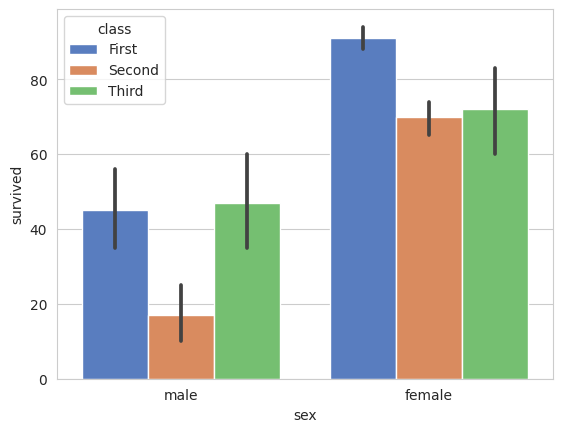

In [29]:
#grouped by First, Second and Third (grouped bye color)
fig, ax = plt.subplots()
#add estimator (e.g. sum) to change the default value (mean)
ax = sns.barplot(x="sex", y="survived", hue="class", data=titanic, palette="muted", estimator=sum, ax=ax)
plt.show()

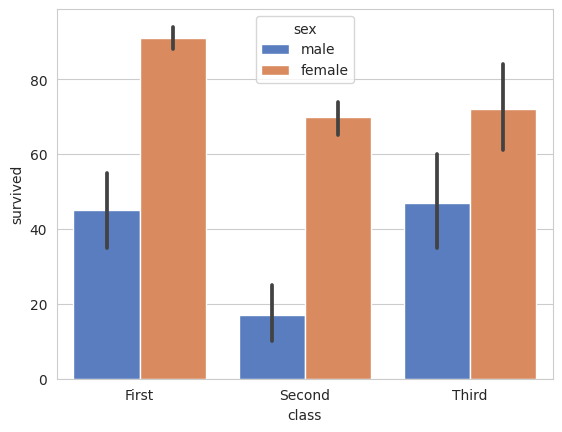

In [31]:
#grouped by First, Second and Third (grouped bye color)
#now using class as the base line instead of sex
fig, ax = plt.subplots()
ax = sns.barplot(x="class", y="survived", hue="sex", data=titanic, palette="muted", estimator=sum, ax=ax)
plt.show()

In [37]:
#creating a bar chart in matplotlib
import pandas as pd
dic1 = {"Product":["Apple", "Banana", "Beer", "Juice", "Apple", "Banana", "Beer", "Juice", "Apple", "Banana", "Beer", "Juice"],
        "Year":[2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002],
        "Revenue":[1,3,4,5, 2,7,6,8, 3,6,2,9]}
df = pd.DataFrame(dic1)
df.head(20)


,Product,Year,Revenue
0,Apple,2000,1
1,Banana,2000,3
2,Beer,2000,4
3,Juice,2000,5
4,Apple,2001,2
5,Banana,2001,7
6,Beer,2001,6
7,Juice,2001,8
8,Apple,2002,3
9,Banana,2002,6


In [40]:
#count unique values
xsize=len(df["Year"].unique())
print(xsize)
#result: 3 different years in the column (2000, 2001, 2002)

3


In [41]:
import numpy as np

x = np.arange(xsize)
print(x)

[0 1 2]


In [42]:
bar_width=0.15

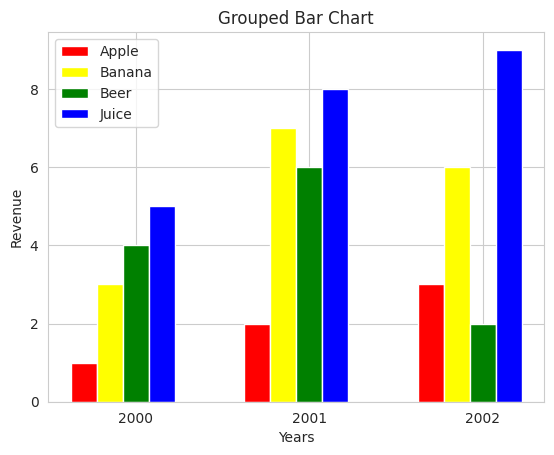

In [49]:
fig, ax = plt.subplots()
#x is from above, then add x+bar_width multiplied
ax.bar(x, "Revenue", width=bar_width, color="red", label="Apple", data=df[df["Product"]=="Apple"])
ax.bar(x+bar_width, "Revenue", width=bar_width, color="yellow", label="Banana", data=df[df["Product"]=="Banana"])
ax.bar(x+bar_width*2, "Revenue", width=bar_width, color="green", label="Beer", data=df[df["Product"]=="Beer"])
ax.bar(x+bar_width*3, "Revenue", width=bar_width, color="blue", label="Juice", data=df[df["Product"]=="Juice"])

ax.set_xticks(x+bar_width*2)
ax.set_xticklabels(["2000", "2001", "2002"])
ax.set_xlabel("Years")
ax.set_ylabel("Revenue")
ax.set_title("Grouped Bar Chart")
plt.legend()
plt.show()

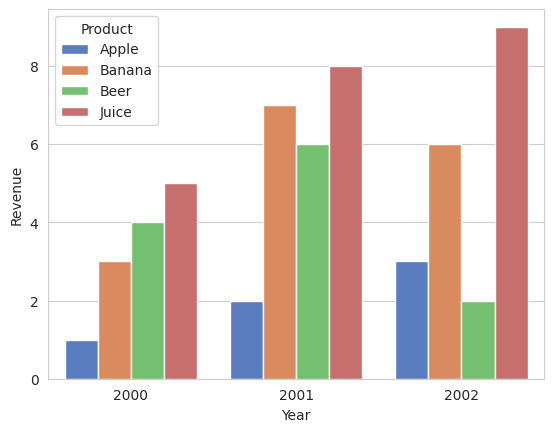

In [50]:
#creating the grouped bar chart much faster with seaborn
fig, ax = plt.subplots()
sns.barplot(x="Year", y="Revenue", hue="Product", data=df, palette="muted", estimator=sum, ax=ax)
plt.show()
#result: same as matplotlib

# 04 Lollipop Chart
- almost identical to a bar chart
- relationship between a numerical value and a categorical variable (like in a bar chart)
- can only be done with matplotlib

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

dic1 = {"Product": ["Apple", "Banana", "Beer", "Juice", "Cheese", "Coffee", "Red Wine", "Hotdog"],
       "Units":[255, 70, 211, 56, 403, 45, 87, 123]}
df = pd.DataFrame(dic1)
df.head(10)

,Product,Units
0,Apple,255
1,Banana,70
2,Beer,211
3,Juice,56
4,Cheese,403
5,Coffee,45
6,Red Wine,87
7,Hotdog,123


/tmp/ipykernel_19006/2200680432.py:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  (markerline, stemlines, baseline) = ax.stem(df["Product"], df["Units"], use_line_collection=True)


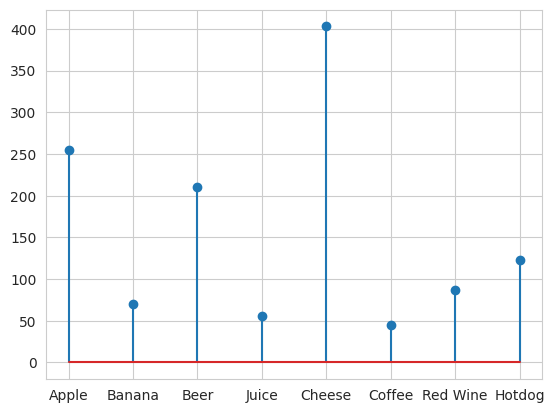

In [54]:
fig, ax = plt.subplots()
(markerline, stemlines, baseline) = ax.stem(df["Product"], df["Units"], use_line_collection=True)

/tmp/ipykernel_19006/850098323.py:3: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  (markerline, stemlines, baseline) = ax.stem(df["Product"], df["Units"], use_line_collection=True)


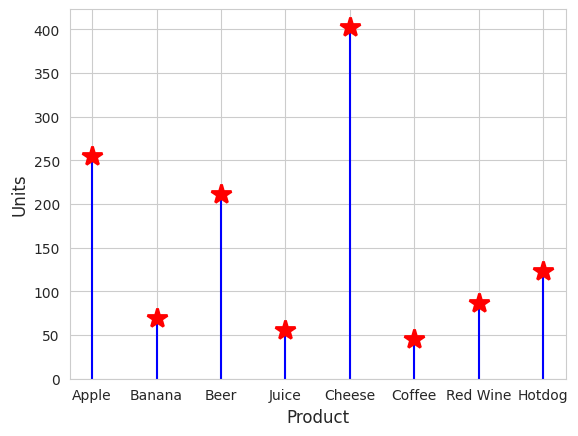

In [62]:
#improve the appearance of the chart:
fig, ax = plt.subplots()
(markerline, stemlines, baseline) = ax.stem(df["Product"], df["Units"], use_line_collection=True)
markerline.set(marker="*", markersize=15, markeredgewidth=2, color="red")
stemlines.set(color="blue")
baseline.set(visible=False)

ax.set_xlabel("Product", size=12)
ax.set_ylabel("Units", size=12)
ax.set_ylim(bottom=0)
plt.show()

In [63]:
df2 = df.sort_values("Units", ascending=False)

/tmp/ipykernel_19006/1390282481.py:3: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  (markerline, stemlines, baseline) = ax.stem(df2["Product"], df2["Units"], use_line_collection=True)


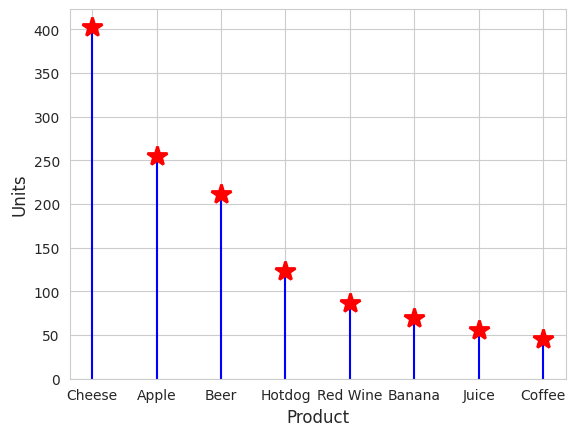

In [64]:
#now look a a sorted version (df2 above)
fig, ax = plt.subplots()
(markerline, stemlines, baseline) = ax.stem(df2["Product"], df2["Units"], use_line_collection=True)
markerline.set(marker="*", markersize=15, markeredgewidth=2, color="red")
stemlines.set(color="blue")
baseline.set(visible=False)

ax.set_xlabel("Product", size=12)
ax.set_ylabel("Units", size=12)
ax.set_ylim(bottom=0)
plt.show()

# 05 Stacked Bar Chart
- stacks bars that represent different groups on top of each other
- each bar on the horizontal axis represents a categorical variable
- each bar on the vertical axis is divided into sub-bars (color-coded)

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dic1 = {"Product":["Apple", "Banana", "Beer", "Juice", "Apple", "Banana", "Beer", "Juice", "Apple", "Banana", "Beer", "Juice"],
        "Year":[2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002],
        "Revenue":[1,3,4,5, 2,7,6,8, 3,6,2,9]}
df = pd.DataFrame(dic1)
xsize=len(df["Year"].unique())
x = np.arange(xsize)
df.head(20)

,Product,Year,Revenue
0,Apple,2000,1
1,Banana,2000,3
2,Beer,2000,4
3,Juice,2000,5
4,Apple,2001,2
5,Banana,2001,7
6,Beer,2001,6
7,Juice,2001,8
8,Apple,2002,3
9,Banana,2002,6


In [68]:
df1=df[df["Product"]=="Apple"].reset_index()
df2=df[df["Product"]=="Banana"].reset_index()
df3=df[df["Product"]=="Beer"].reset_index()

/tmp/ipykernel_19006/1161995182.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["2000", "2001", "2002"])


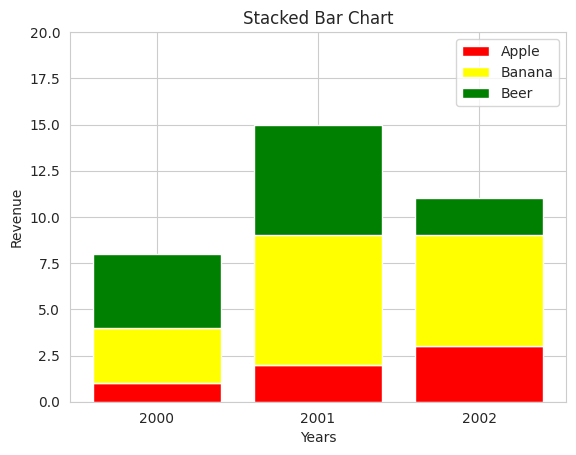

In [69]:
#bottom defines the base line for each bar plot
#bottoms have to be added
#idea: present the relative decomposition of a primary bar based on the second bar
#... how a specific product contributes to the total revenue
fig, ax = plt.subplots()
ax.bar(x, "Revenue", color="red", label="Apple", data=df1)
ax.bar(x, "Revenue", bottom=df1["Revenue"], color="yellow", label="Banana", data=df2)
ax.bar(x, "Revenue", bottom=df1["Revenue"]+df2["Revenue"], color="green", label="Beer", data=df3)

ax.set_xlabel("Years")
ax.set_ylabel("Revenue")
ax.set_title("Stacked Bar Chart")
ax.set_xticklabels(["2000", "2001", "2002"])
ax.set_xticks(x)

ax.set_ylim(0, 20)
ax.legend()
plt.show()

# 06 Pie Chart
- proportion visualization
- the size of the slize is proportional to the quantity it represents

In [70]:
slices = [100, 40, 20]
labels = ["Group A", "Group B", "Group C"]
colors = ["red", "yellow", "pink"]

/tmp/ipykernel_19006/3070574731.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


<function matplotlib.pyplot.show(close=None, block=None)>

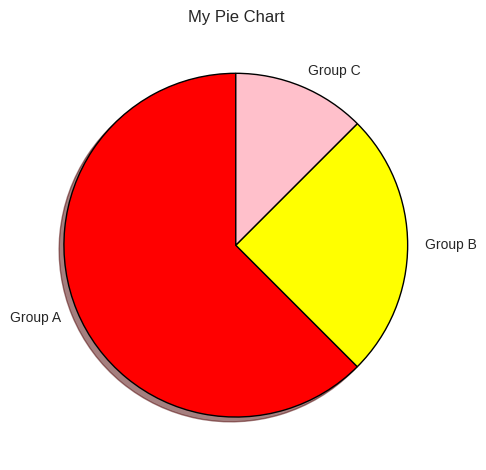

In [72]:
plt.style.use("seaborn-darkgrid")
fig, ax = plt.subplots()
ax.set_title("My Pie Chart")
ax.pie(slices, labels=labels, wedgeprops={"edgecolor":"black"}, colors=colors, shadow=True, startangle=90)
plt.tight_layout()
plt.show

/tmp/ipykernel_19006/2686551795.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


<function matplotlib.pyplot.show(close=None, block=None)>

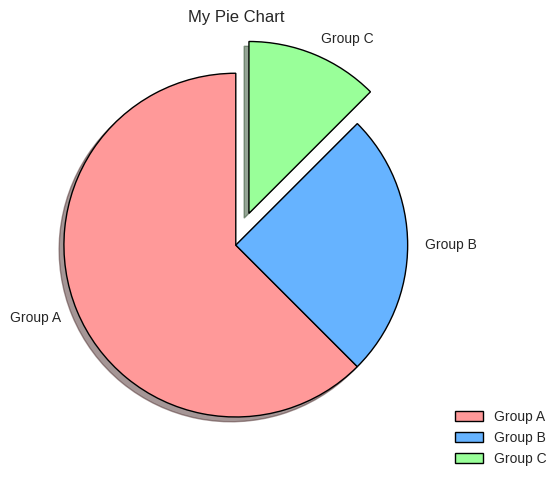

In [83]:
#best for max 6-7 items
explode = [0,0, 0.2]
colors_hex = ["#ff9999", "#66b3ff", "#99ff99"]

plt.style.use("seaborn-darkgrid")
fig, ax = plt.subplots()
ax.set_title("My Pie Chart")
#autopct calculates automatically the percentage
ax.pie(slices, labels=labels, wedgeprops={"edgecolor":"black"}, colors=colors_hex, explode=explode, shadow=True, startangle=90, autopct="%1.1f%%")
fig.legend(loc="lower right")
plt.tight_layout()
plt.show

# 07 Treemap
- visual proportion of categorical variable
- very efficient use of the chart space
- each rectangle will have a different size based on the freqency of that group and a dedicated color

In [84]:
import squarify

In [85]:
dic1 = {"Product": ["Apple", "Banana", "Beer", "Juice", "Cheese", "Coffee", "Red Wine", "Hotdog"],
       "Units":[255, 70, 211, 56, 403, 45, 87, 123]}
df = pd.DataFrame(dic1)
df.head(10)

,Product,Units
0,Apple,255
1,Banana,70
2,Beer,211
3,Juice,56
4,Cheese,403
5,Coffee,45
6,Red Wine,87
7,Hotdog,123


In [86]:
df.sort_values("Units", ascending=False, inplace=True)
df.head(10)

,Product,Units
4,Cheese,403
0,Apple,255
2,Beer,211
7,Hotdog,123
6,Red Wine,87
1,Banana,70
3,Juice,56
5,Coffee,45


In [87]:
colors = ["red", "green", "blue", "yellow", "pink", "Coral", "Magenta", "Violet"]

In [88]:
squarify.plot? #describes possible parameters

<function matplotlib.pyplot.show(close=None, block=None)>

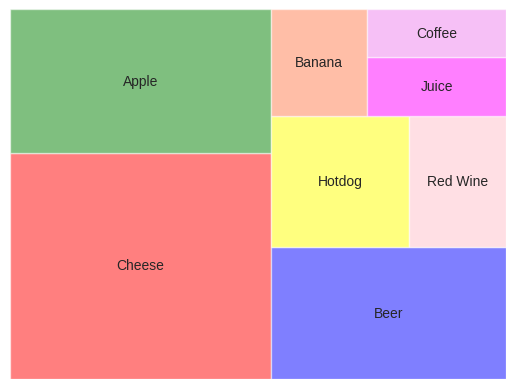

In [89]:
squarify.plot(sizes=df["Units"], label=df["Product"], color=colors, alpha=0.5)
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

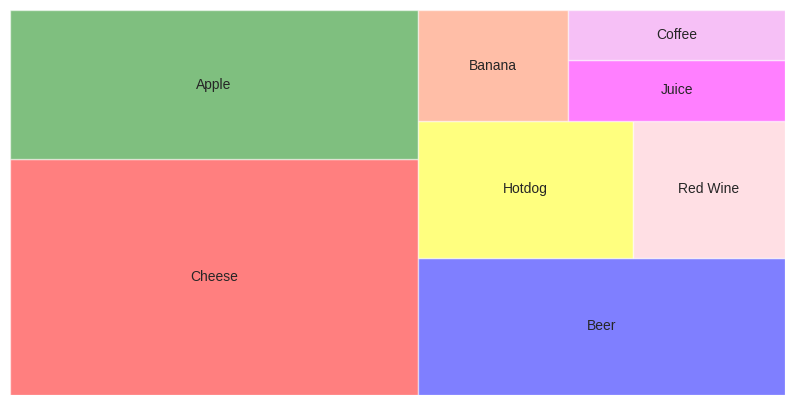

In [91]:
fig, ax = plt.subplots(figsize=(10,5))
squarify.plot(sizes=df["Units"], label=df["Product"], color=colors, alpha=0.5, ax=ax)
plt.axis("off")
plt.show

# 08 Optimizing Colors

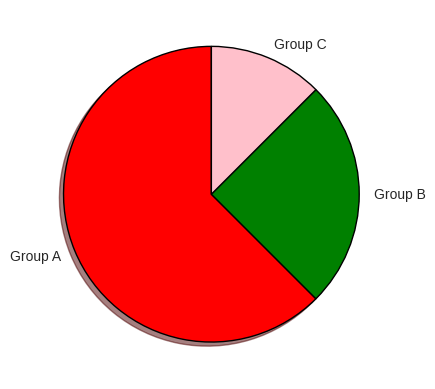

In [92]:
import matplotlib.pyplot as plt

slices = [100, 40, 20]
labels = ["Group A", "Group B", "Group C"]
mycolors = ["red", "green", "pink"] #specify: use google -> color picker
fig, ax = plt.subplots()
ax.pie(slices, labels=labels, wedgeprops={"edgecolor":"black"}, colors=mycolors, shadow=True, startangle=90)
plt.show()

#### color maps
https://matplotlib.org/stable/users/explain/colors/colormaps.html

<function matplotlib.pyplot.show(close=None, block=None)>

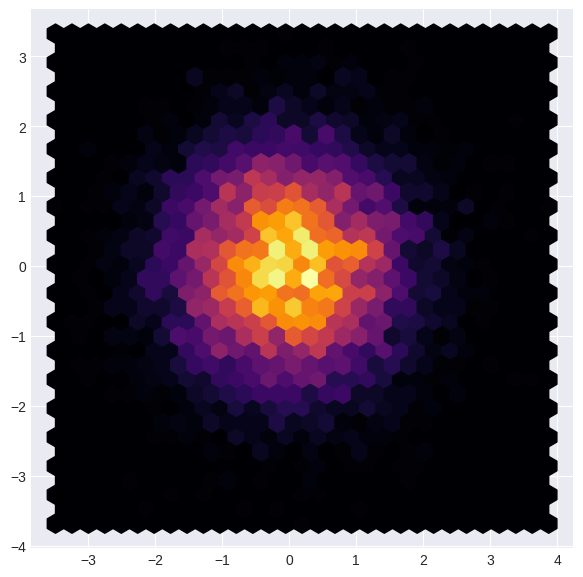

In [96]:
#colormaps
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

n = 10000
df = pd.DataFrame({"x": np.random.randn(n),
                  "y": np.random.randn(n)})
fig, ax = plt.subplots(figsize=(7, 7)) #figsize can also be left empty
ax.hexbin("x", "y", gridsize=30, cmap="inferno", data=df) #find your preferred cmap via link above
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

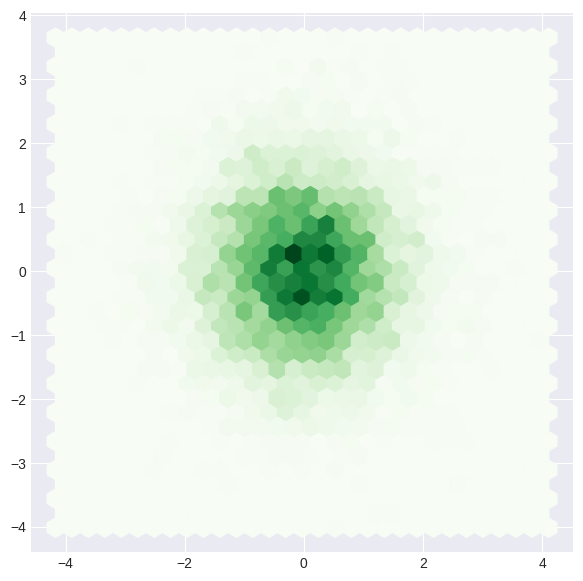

In [97]:
#colormaps
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

n = 10000
df = pd.DataFrame({"x": np.random.randn(n),
                  "y": np.random.randn(n)})
fig, ax = plt.subplots(figsize=(7, 7)) #figsize can also be left empty
ax.hexbin("x", "y", gridsize=30, cmap="Greens", data=df) #find your preferred cmap via link above
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

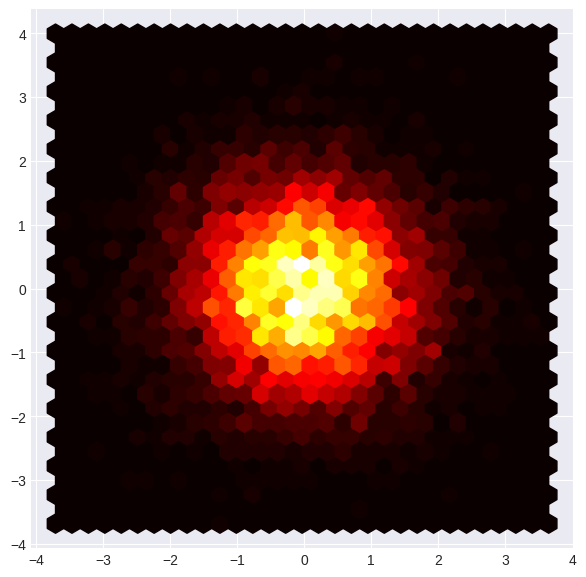

In [98]:
#colormaps
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

n = 10000
df = pd.DataFrame({"x": np.random.randn(n),
                  "y": np.random.randn(n)})
fig, ax = plt.subplots(figsize=(7, 7)) #figsize can also be left empty
ax.hexbin("x", "y", gridsize=30, cmap="hot", data=df) #find your preferred cmap via link above
plt.show